In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.preprocessing import scale

In [2]:
sk_datasets = {}
sk_labels = {}

def plot_data_labels_dict(data_labels_dict, n_datasets, cmap="bwr"):
    fig, axes = plt.subplots(n_datasets, 2, figsize=(10, 24/5*n_datasets), sharex=True, sharey=True)
    for i, (category, (data, labels)) in enumerate(data_labels_dict.items()):
        axes[i][0].scatter(data[:, 0], data[:, 1], s=1)
        axes[i][1].scatter(data[:, 0], data[:, 1], s=1, c=labels, cmap=cmap)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

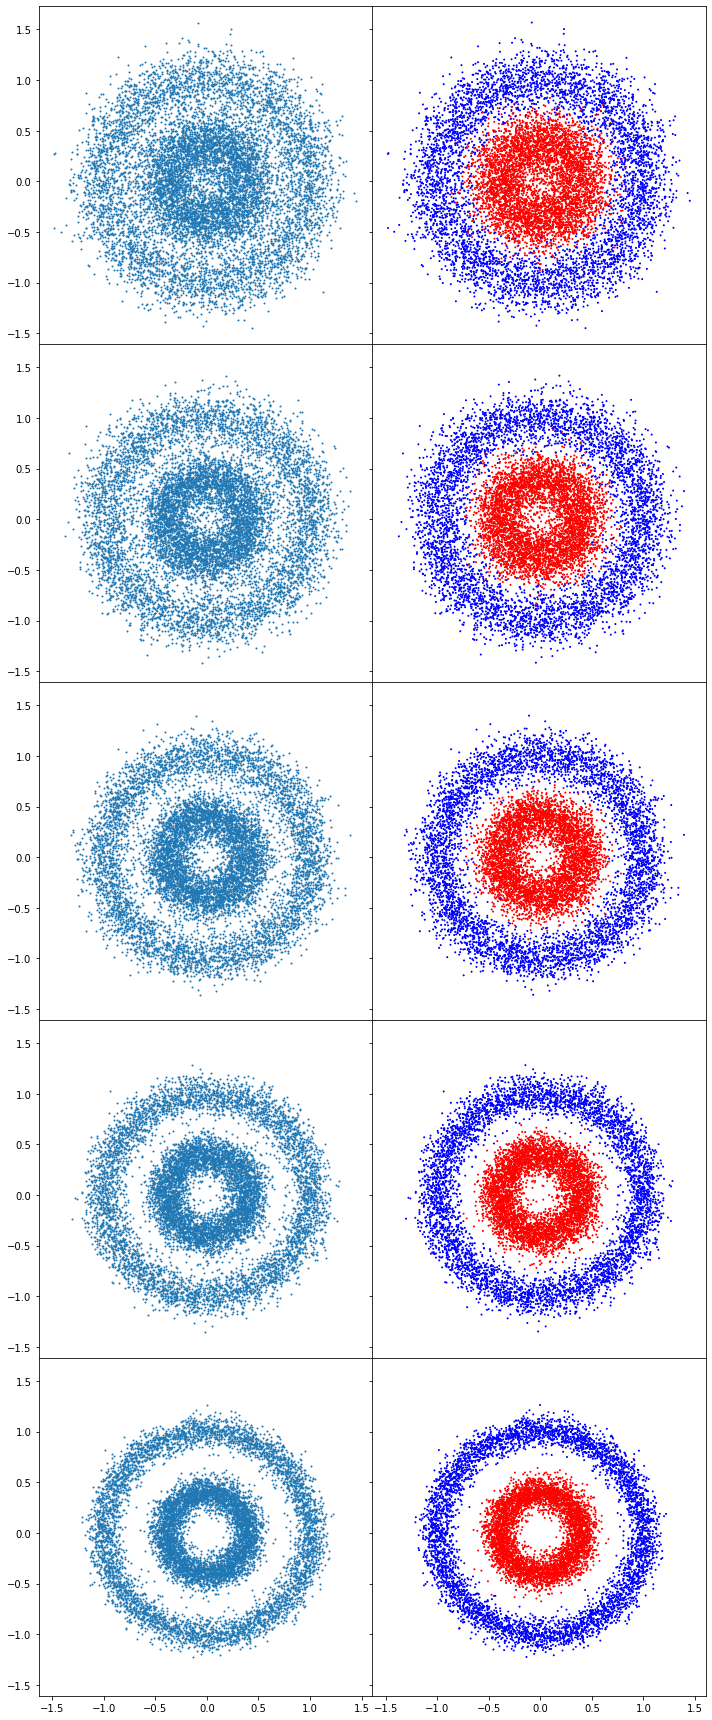

In [3]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [0.16, 0.14, 0.12, 0.1, 0.08]

circles_dict = {category:datasets.make_circles(n_samples=10000, noise=level, factor=0.4)
              for category, level in zip(noise_categories, noise_levels)}

plot_data_labels_dict(circles_dict, len(noise_categories))

for category, (data, labels) in circles_dict.items():
    sk_datasets["circles_" + category + "_noise"] = data
    sk_labels["circles_" + category + "_noise"] = labels

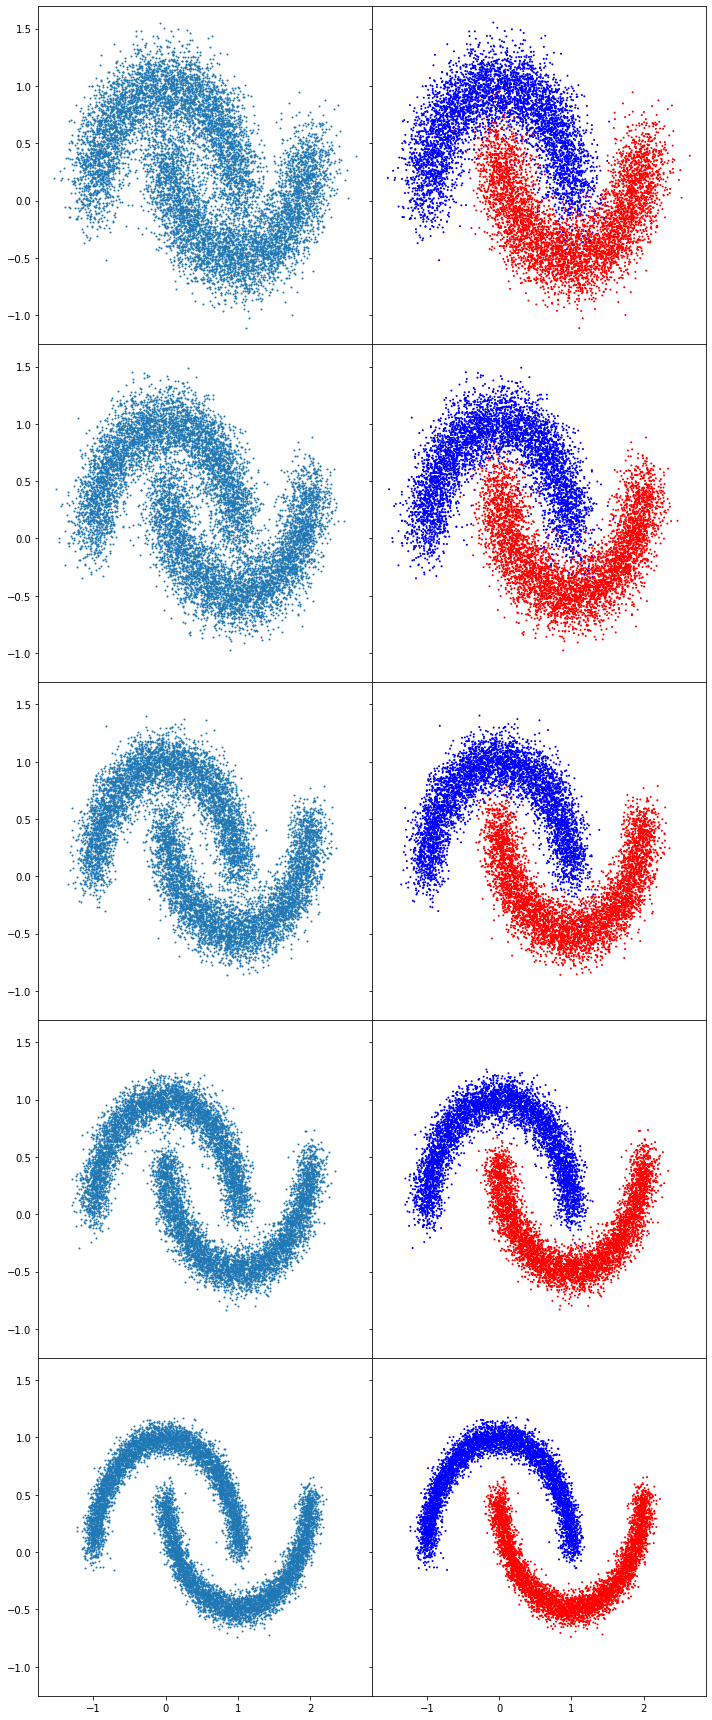

In [4]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [0.18, 0.16, 0.13, 0.1, 0.07]

moons_dict = {category:datasets.make_moons(n_samples=10000, noise=level)
              for category, level in zip(noise_categories, noise_levels)}

plot_data_labels_dict(moons_dict, 5)
    
for category, (data, labels) in moons_dict.items():
    sk_datasets["moons_" + category + "_noise"] = data
    sk_labels["moons_" + category + "_noise"] = labels

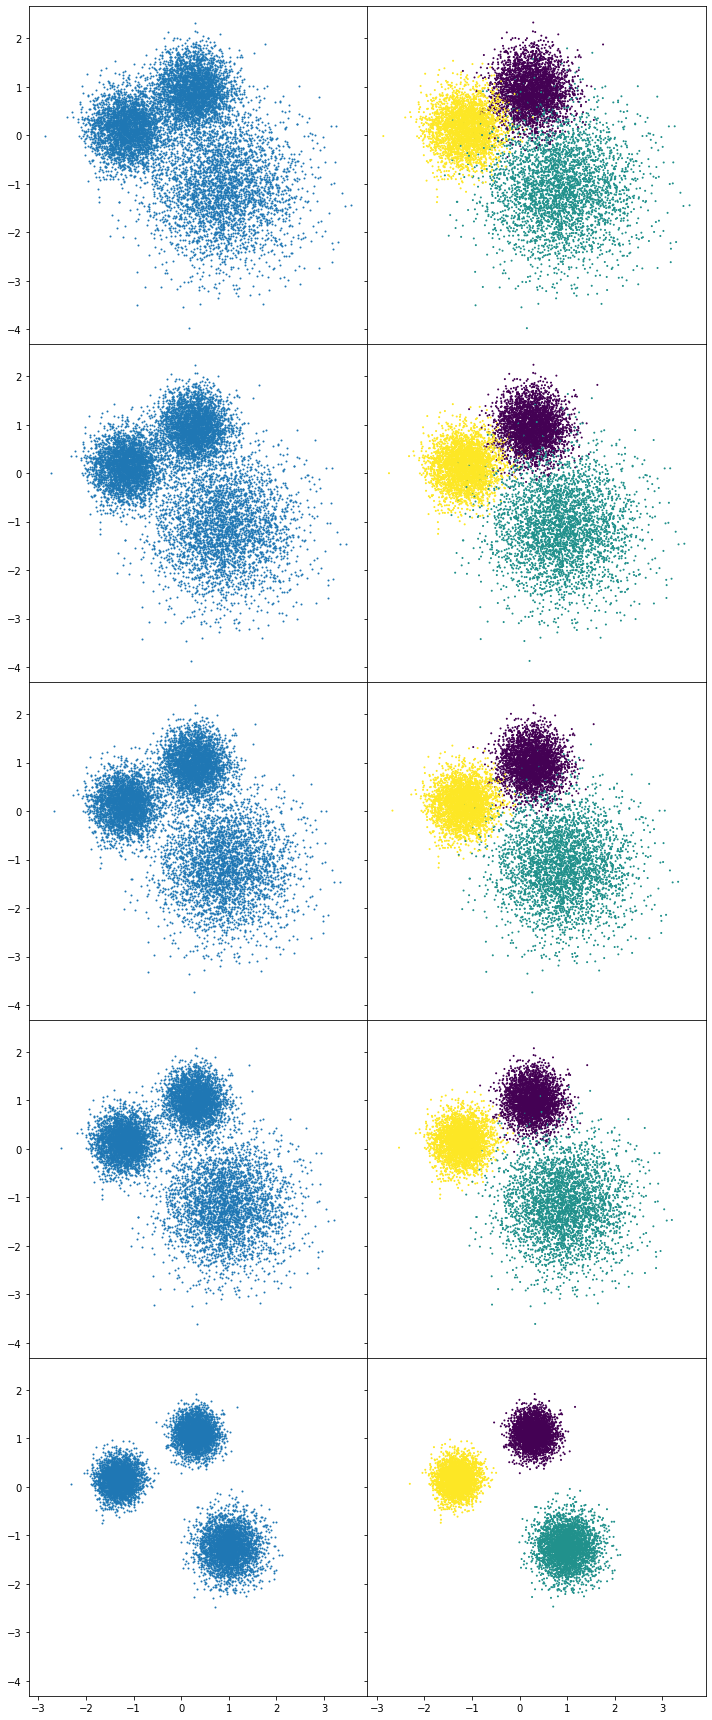

In [5]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [(0.7, 1.4, 0.7), 
                (0.625, 1.3, 0.625), 
                (0.575, 1.2, 0.575), 
                (0.5, 1.1, 0.5), 
                (0.35, 0.5, 0.35)]

blobs_dict = {category:datasets.make_blobs(n_samples=10000, cluster_std=level, random_state=0)
              for category, level in zip(noise_categories, noise_levels)}
blobs_dict = {category:(scale(data), labels) for category, (data, labels) in blobs_dict.items()}


plot_data_labels_dict(blobs_dict, 5, "viridis")

for category, (data, labels) in blobs_dict.items():
    sk_datasets["blobs_" + category + "_noise"] = data
    sk_labels["blobs_" + category + "_noise"] = labels

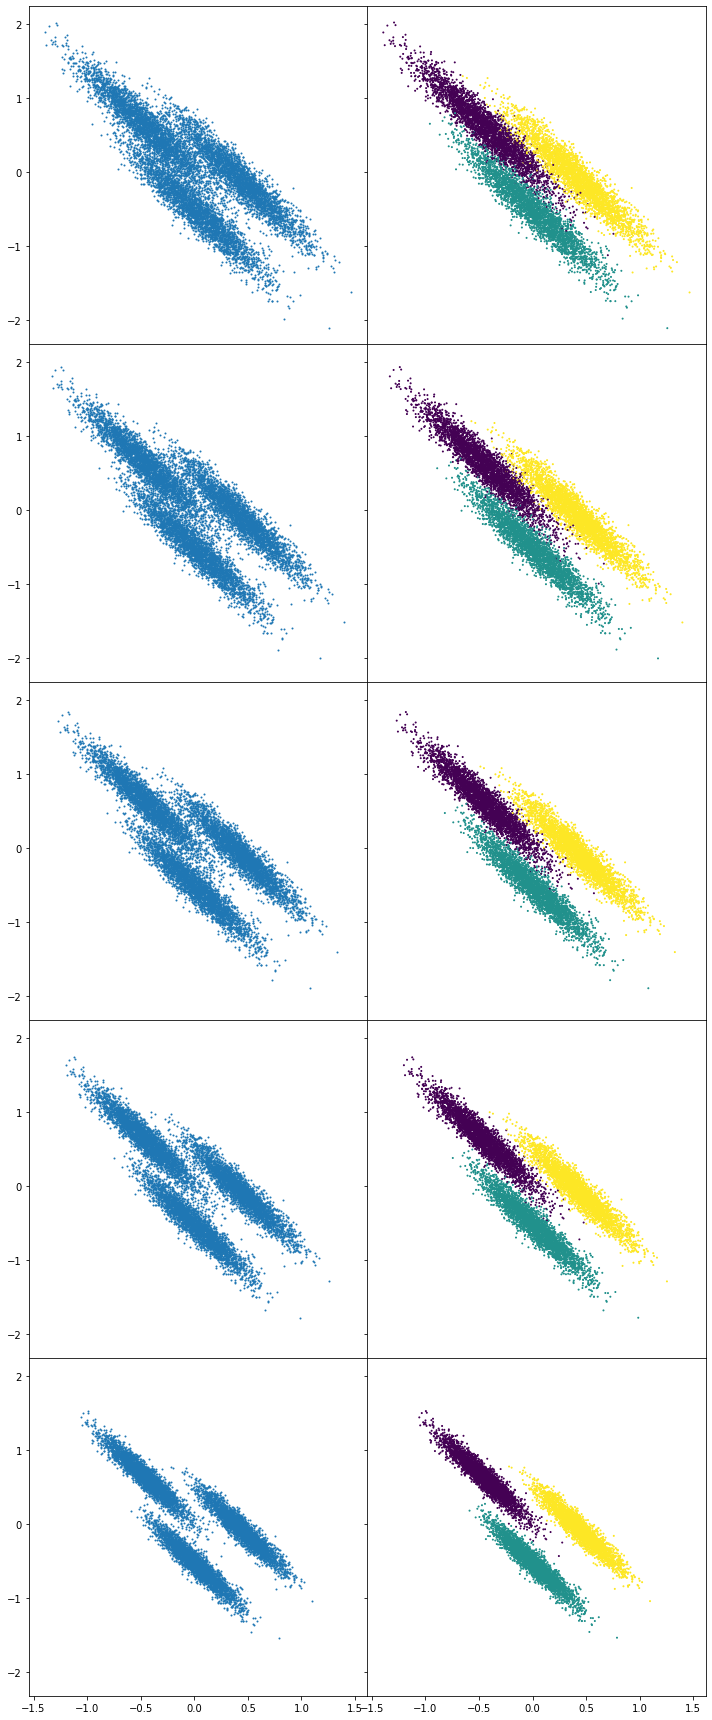

In [6]:
noise_categories = ["vhigh", "high", "med", "low", "vlow"]
noise_levels = [2.4, 2.2, 2, 1.8, 1.4]
transform = np.array([[0.6, -0.6], [-0.4, 0.8]])

blobs_dict = {category:datasets.make_blobs(n_samples=10000, cluster_std=level, random_state=17)
              for category, level in zip(noise_categories, noise_levels)}
blobs_dict = {category:(np.dot(scale(data[0]), transform), data[1]) for category, data in blobs_dict.items()}

plot_data_labels_dict(blobs_dict, 5, "viridis")   

for category, (data, labels) in blobs_dict.items():
    sk_datasets["longblobs_" + category + "_noise"] = data
    sk_labels["longblobs_" + category + "_noise"] = labels

In [7]:
np.savez("sklearn_data.npz", **sk_datasets)
np.savez("sklearn_labels.npz", **sk_labels)